<b>The Problem Statement</b>:

Implement a Python Code for the following problem:

A logistics company is trying to optimize their delivery routes. They have a dataset of historical delivery data, which includes the start and end points of each delivery, as well as the distance between each point. They want to use graph-based visualization and logical reasoning to identify the most efficient delivery routes between any two points when provided to the code.

The dataset is:

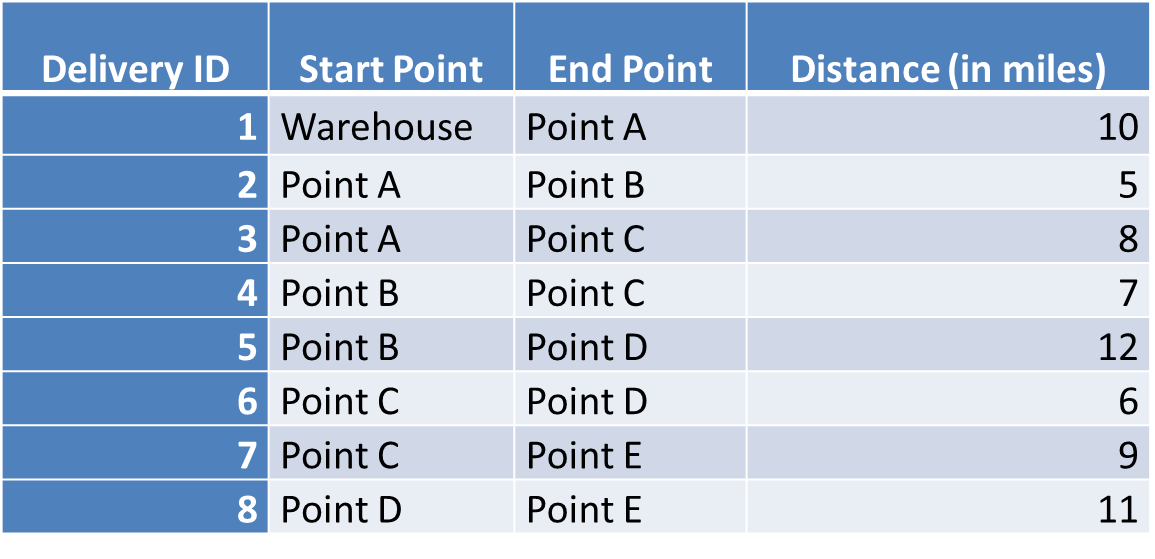








## The Code

### Imports

In [ ]:
!pip install pyvis
!pip install networkx

In [2]:
### To plot a networkx graph in pyvis
import networkx as nx
from pyvis.network import Network

import warnings
warnings.filterwarnings('ignore')

### Graph Building using Networkx

In [3]:
# Step 1: Create a graph representation of delivery routes
def create_delivery_graph(data):
    # TODO: Implement this function to create a graph from the given delivery data using NetworkX
    G = nx.Graph()
    
    for row in data:
        G.add_edge(row[1], row[2], weight=row[3] ) #, edge_label =row[3] , label=row[3])
    return G

### Graph Visualize using Pyvis

In [4]:
# Step 2: Visualize the graph using Pyvis
def visualize_graph(G):
    # TODO: Implement this function to visualize the graph using Pyvis
    nt = Network(notebook=True, height="750px", width="100%")
    nt.from_nx(G)
    nt.set_edge_smooth('dynamic')
    nt.show_buttons(filter_=['physics'])
    nt.force_atlas_2based()
    nt.show("graph.html")

### A* Search Algorithm

In [5]:
# Step 3: Implement A* heuristic search algorithm
def astar_search(graph, start, end):
    # TODO: Implement the A* heuristic search algorithm to find the shortest path
    def heuristic(node, goal):
        # Calculate Euclidean distance as a heuristic
        pos_node = graph.nodes[node].get("pos", (0, 0))
        pos_goal = graph.nodes[goal].get("pos", (0, 0))
        return ((pos_node[0] - pos_goal[0]) ** 2 + (pos_node[1] - pos_goal[1]) ** 2) ** 0.5

    # Specify the weight attribute
    weight_attribute = 'weight'

    # Only capture the path, not the distance
    path = nx.astar_path(graph, start, end, heuristic=heuristic, weight=weight_attribute)

    # Calculate the distance separately   
    global delivery_data
    distance = 0 
    for i in range(len(path)-1):
        for j in delivery_data:
            if path[i] in j and path[i+1] in j:
                distance += j[3]

    return path, distance

### Main function to solve the problem

In [6]:
if __name__ == "__main__":
    # Sample dataset
    delivery_data = [
        (1, 'Warehouse', 'Point A', 10),
        (2, 'Point A', 'Point B', 5),
        (3, 'Point A', 'Point C', 8),
        (4, 'Point B', 'Point C', 7),
        (5, 'Point B', 'Point D', 12),
        (6, 'Point C', 'Point D', 6),
        (7, 'Point C', 'Point E', 9),
        (8, 'Point D', 'Point E', 11)
    ]

    # Create the delivery graph
    delivery_graph = create_delivery_graph(delivery_data)

    # Visualize the graph
    visualize_graph(delivery_graph)

    # Find the shortest distance using A* heuristic search
    start_point = 'Warehouse'
    end_point = 'Point E'
    shortest_path, shortest_distance = astar_search(delivery_graph, start_point, end_point)

    if shortest_path:
        print(f"Shortest path from {start_point} to {end_point}: {' -> '.join(shortest_path)}")
        print(f"Shortest distance: {shortest_distance} miles")
    else:
        print(f"No path found from {start_point} to {end_point}")

graph.html
Shortest path from Warehouse to Point E: Warehouse -> Point A -> Point C -> Point E
Shortest distance: 27 miles
